In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import docx
from docx import Document
import csv
import io
from docx.shared import Inches
from docx.enum.section import WD_SECTION
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.shared import Pt, RGBColor
import numpy as np
import datetime
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml
from docx.shared import RGBColor
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml

F="final.csv"
af= pd.read_csv("final.csv")

print (af)

  loc_id\tno_poles\tnom_cir_vlt\tcond_type\tcond_size\tno_runs\tins_type\tcond_len\ttype_supply\tearth_config\ttype_cir_loc\tno_phases\tb_curve_type\tup_b_sen\tspd_applicable\tmeas_term\ttest_vlt\tleak_cap_nf\tins_res_mohm\tresult_ir\tdistance_prev_loc\tnom_vlt_e_v\tapp_test_vlt\tmeas_out_curr_ma\tres_kohm\tresult_fwr\trc_route_ele_1\trc_route_ele_2\tcond_temp\tcont_found\tlead_int_res\tcon_res\tcorr_cont_res\tspec_cond_res\tresult_rc\tresult_remarks_rc\top_l1_l2_v\top_l2_l3_v\top_l3_l1_v\top_l1_n_v\top_l2_n_v\top_l3_n_v\tphase_seq\tresult_op\tvd_route_ele_1\tvd_route_ele_2\tele_1_l_n_v\tele_2_l_n_v\ttype_install_supply\tpur_supply\tvlt_drop_v\tvlt_drop_perc\tresult_vd\tpt_device_type\tl_n_v\tpol_ref\tpol\ttype_earth_sys\tnom_l_e_v\tnom_curr_rating\trated_res_op_curr\tappl_type\ttrip_curve_type\ttest_curr_ma\ttrip_curr_ma\ttrip_time\tdevice_trip\tresult_rcd\tno_eecp\tea\ttype_earthing\tdepth_iee\td_nee\tmeri\tceri\telec_dis_ratio\tresult_epe\trated_line_vlt\ttps_l1_l2_v\ttps_l2_l3_v\tt

  Earthing Configuration Type of Circuit Location  Device Rating (A)  \
0                    TNC                      NaN                 63   
1                    TNS                      NaN                 25   
2                    TNS                    Final                630   

  device_make device_type  device_sensitivity  No.of Phases         Trip Curve  
0         ABB         MCB                 NaN             3                  D  
1     Siemens         MCB                 NaN             3                  C  
2     Siemens         ACB                 NaN             3  IEC Ultra Inverse  
   V_LN (V)  V_NE (V)  V_LE (V)  L1-ELI (O)  L2-ELI (O)  L1-ELI (O)  Psc (kA)
0       240         0       240        3.60        3.64        3.60      0.07
1       238         0       238        0.56        0.49        0.56      0.43
2       240         0       240        0.02        0.01        0.02     12.00


In [2]:
from docx import Document
from docx.shared import Pt
from datetime import datetime

# Create a new document
doc = Document()

# Set the font style and size for the document (optional)
normal_style = doc.styles['Normal']
normal_style.font.name = 'Calibri'
normal_style.font.size = Pt(12)

# Add content to the document, including the page number placeholder
doc.add_heading("Title", level=1)
doc.add_paragraph("This is the content of the document.")
doc.add_page_break()
doc.add_paragraph("This is the content on the second page.")

# Add the page number placeholder to the footer
for section in doc.sections:
    footer = section.footer
    footer_paragraph = footer.paragraphs[0]
    footer_paragraph.text = "Page {PAGE}"
    for run in footer_paragraph.runs:
        run.font.name = "Calibri"
        run.font.size = Pt(7)

# Save the Word document
doc.save('adte.docx')  # Replace 'output_doc.docx' with the desired file name


ModuleNotFoundError: No module named 'docx'

In [5]:

phs_seq=af[
    [
        "loc_id",
        "op_l1_l2_v",
        "op_l2_l3_v",
        "op_l3_l1_v",
        "op_l1_n_v",
        "op_l2_n_v",
        "op_l3_n_v",
        "phase_seq",
    ]
]
print (phs_seq)

KeyError: "None of [Index(['loc_id', 'op_l1_l2_v', 'op_l2_l3_v', 'op_l3_l1_v', 'op_l1_n_v',\n       'op_l2_n_v', 'op_l3_n_v', 'phase_seq'],\n      dtype='object')] are in the [columns]"

In [6]:
import pandas as pd

# Read the CSV file into a DataFrame
af = pd.read_csv("final.csv")

# Select specific columns and create a new DataFrame
phs_seq = af[
    [
        "loc_id",
        "op_l1_l2_v",
        "op_l2_l3_v",
        "op_l3_l1_v",
        "op_l1_n_v",
        "op_l2_n_v",
        "op_l3_n_v",
        "phase_seq",
    ]
]

# Print the new DataFrame
print(phs_seq)


KeyError: "None of [Index(['loc_id', 'op_l1_l2_v', 'op_l2_l3_v', 'op_l3_l1_v', 'op_l1_n_v',\n       'op_l2_n_v', 'op_l3_n_v', 'phase_seq'],\n      dtype='object')] are in the [columns]"

In [7]:
import pandas as pd

af = pd.read_csv("final.csv")
print(af.columns)


Index(['loc_id\tno_poles\tnom_cir_vlt\tcond_type\tcond_size\tno_runs\tins_type\tcond_len\ttype_supply\tearth_config\ttype_cir_loc\tno_phases\tb_curve_type\tup_b_sen\tspd_applicable\tmeas_term\ttest_vlt\tleak_cap_nf\tins_res_mohm\tresult_ir\tdistance_prev_loc\tnom_vlt_e_v\tapp_test_vlt\tmeas_out_curr_ma\tres_kohm\tresult_fwr\trc_route_ele_1\trc_route_ele_2\tcond_temp\tcont_found\tlead_int_res\tcon_res\tcorr_cont_res\tspec_cond_res\tresult_rc\tresult_remarks_rc\top_l1_l2_v\top_l2_l3_v\top_l3_l1_v\top_l1_n_v\top_l2_n_v\top_l3_n_v\tphase_seq\tresult_op\tvd_route_ele_1\tvd_route_ele_2\tele_1_l_n_v\tele_2_l_n_v\ttype_install_supply\tpur_supply\tvlt_drop_v\tvlt_drop_perc\tresult_vd\tpt_device_type\tl_n_v\tpol_ref\tpol\ttype_earth_sys\tnom_l_e_v\tnom_curr_rating\trated_res_op_curr\tappl_type\ttrip_curve_type\ttest_curr_ma\ttrip_curr_ma\ttrip_time\tdevice_trip\tresult_rcd\tno_eecp\tea\ttype_earthing\tdepth_iee\td_nee\tmeri\tceri\telec_dis_ratio\tresult_epe\trated_line_vlt\ttps_l1_l2_v\ttps_l2_l

In [9]:
import pandas as pd

af = pd.read_csv("final.csv")
af.columns = af.columns.str.strip()  # Remove leading/trailing whitespaces from column names

phs_seq = af[
    [
        "loc_id",
        "op_l1_l2_v",
        "op_l2_l3_v",
        "op_l3_l1_v",
        "op_l1_n_v",
        "op_l2_n_v",
        "op_l3_n_v",
        "phase_seq",
    ]
]

print(phs_seq)


   loc_id  op_l1_l2_v  op_l2_l3_v  op_l3_l1_v  op_l1_n_v  op_l2_n_v  \
0       4       420.0       417.0       419.0      242.0      241.0   
1      10       421.0       418.0       420.0      242.0      240.0   
2       6         NaN         NaN         NaN        NaN        NaN   

   op_l3_n_v phase_seq  
0      242.0       RBY  
1      239.0       RYB  
2        NaN       NaN  


TypeError: 'value' must be an instance of str or bytes, not a float

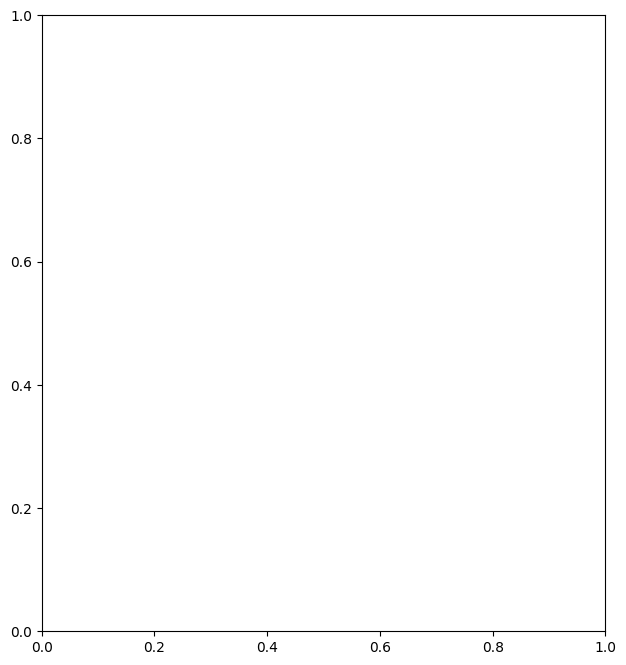

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import docx
from docx import Document
import csv
import io
from docx.shared import Inches
from docx.enum.section import WD_SECTION
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.shared import Pt, RGBColor
import numpy as np
import datetime
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml
from docx.shared import RGBColor
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml

F="final.csv"
af= pd.read_csv("final.csv")

phs_seq=af[
    [
        "loc_id",
        "op_l1_l2_v",
        "op_l2_l3_v",
        "op_l3_l1_v",
        "op_l1_n_v",
        "op_l2_n_v",
        "op_l3_n_v",
        "phase_seq",
    ]
]

def phase_result(phase_seq):
    if phase_seq == 'RYB':
        return "CLOCKWISE"
    else:
        return "ANTICLOCKWISE"

def phase_rang(phs_seq):
    res3 = []
    phase_seqs = phs_seq["phase_seq"]
    for seq in phase_seqs:
        if seq == "RYB":
            res3.append("CLOCKWISE")
        elif seq == "RBY":
            res3.append("ANTICLOCKWISE")
        else:
            res3.append("UNKNOWN")
    return res3

def phase_table(phs_seq, doc):
    table_data = phs_seq.iloc[:, :]
    num_rows, num_cols = table_data.shape
    table = doc.add_table(rows=num_rows + 1, cols=num_cols + 1)
    table.style = "Table Grid"
    table.autofit = False

    column_widths = {
        0: 0.2,
        1: 0.4,
        2: 0.4,
        3: 0.4,
        4: 0.6,
        5: 0.3,
        6: 0.3,
        7: 0.4,
        8: 0.4,
        9: 0.4,
        10: 0.4,
        11: 0.4,
        12:0.6,
    }
    for j, col in enumerate(table_data.columns):
        table.cell(0, j).text = col
        table.cell(0, j).width = Inches(column_widths[j])
    for i, row in enumerate(table_data.itertuples(), start=0):
        for j, value in enumerate(row[1:], start=0):
            table.cell(i + 1, j).text = str(value)
    results = phase_rang(phs_seq)

    table.cell(0, num_cols).text = "Result"
    for i, result in enumerate(results, start=1):
        table.cell(i, num_cols).text = result
        table.cell(i, num_cols).width=Inches(0.8)

    font_size = 8
    for row in table.rows:
        for cell in row.cells:
            for paragraph in cell.paragraphs:
                for run in paragraph.runs:
                    run.font.size = Pt(font_size)
    return doc


def phase_combined_graph(phs_seq):
    plt.figure(figsize=(16, 8))

    # Bar graph
    plt.subplot(121)
    x = phs_seq[ "op_l3_n_v"]
    y = phs_seq[ "phase_seq"]
    colors = ["#d9534f", "#5bc0de", "#5cb85c", "#428bca"]
    plt.bar(x, y, color=colors)
    plt.xlabel("Phase Sequence")
    plt.ylabel("V-L3-N")
    plt.title("Phase Sequence by V-L3-N")

    # Pie chart
    plt.subplot(122)
    phs_seq['Result'] = phase_rang(phs_seq)  # Ensure you have the phase_rang() function defined correctly
    phs_seq_counts = phs_seq['Result'].value_counts()
    labels = phs_seq_counts.index.tolist()
    values = phs_seq_counts.values.tolist()
    colors = ["#5ac85a", "#dc0000"]
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.axis('equal')
    plt.title('Test Results')
    graph_combined = io.BytesIO()
    plt.savefig(graph_combined)
    plt.close()

    return graph_combined


def main():
    af = pd.read_csv("final.csv")
    doc = Document()
    doc.add_heading('Phase Sequence test', 0)
    doc =phase_table(phs_seq, doc)
    graph_combined = phase_combined_graph(phs_seq)
    doc.add_picture(graph_combined, width=Inches(8), height=Inches(4))  
    doc.save("newtest.docx")

main()




In [15]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import io
from datetime import datetime
F = pd.read_csv("main.csv")


#--------------eli-cb--------------- 
elicb = pd.DataFrame() 
elicb["Earthing Configuration"]= F["earth_config"]
elicb["device_make"] = F["elicb_device_make"]
elicb["device_type"]= F["elicb_device_type"]
elicb["device_sensitivity"]= F["device_sen"]
elicb["Device Rating (A)"]= F["elicb_device_rating"]
# TMS - TDS	eli_tms          not there
elicb["Type of Circuit Location"]=F["type_cir_loc"]
elicb["No.of Phases"]=F["no_phases"]
elicb["Trip Curve"]=F["b_curve_type"]
elicb["V_LN (V)"]=F["elicb_mvln"]
elicb["V_NE (V)"]=F["elicb_mvne"]
elicb["V_LE (V)"]=F["elicb_mvle"]
elicb["L1-ELI (O)"]=F["elicb_mel1"]
elicb["L2-ELI (O)"]=F["elicb_mel2"]
elicb["L3-ELI (O)"]=F["elicb_mel3"]
elicb["Psc (kA)"]=F["elicb_psc"]
elicb["Suggested Max ELI (O)"]=F["elicb_max_eli"]
elicb_filled = elicb.fillna("")
elicb["Device Rating (A)"] = elicb["Device Rating (A)"].astype(int)
new_column1 = []
result_column1 = []
P = 0
K = 0
TMS = 1
TDS = 1
elicb_filled = elicb.fillna("")
elicb["Device Rating (A)"] =elicb["Device Rating (A)"].astype(int)
Is = elicb["Device Rating (A)"]

gf1 = elicb[
    [
        "Earthing Configuration",
        "Type of Circuit Location",
        "Device Rating (A)",
        "device_make",
        "device_type",
        "device_sensitivity",
        "No.of Phases",
        "Trip Curve",
    ]
]

gf2 = elicb[
    [

        "V_LN (V)",
        "V_NE (V)",
        "V_LE (V)",
        "L1-ELI (O)",
        "L2-ELI (O)",
        "L1-ELI (O)",
        "Psc (kA)",
    ]
]


def eli_test_result1(gf1, gf2):
    I = Is * ((((K * TMS) / Td) + 1) ** (1 / P))
    if gf1["Earthing Configuration"] == "TN":
        IEC_val_TN = gf2["V_LE (V)"] / I
        new_column1.append(round(IEC_val_TN, 4))
        if gf1["No. of Phases"] == 3:
            if (
            gf2["L1-ELI (O)"] <= IEC_val_TN
                and gf2["L2-ELI (O)"] <= IEC_val_TN
                and gf2["L3-ELI (O)"] <= IEC_val_TN
            ):
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        elif gf1["No.of Phases"] == 1:
            if gf2["L1-ELI (O)"] <= IEC_val_TN:
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        else:
            result_column1.append("N/A")
    elif gf1["Earthing Configuration"] == "TT":
        IEC_val_TT = 50 / I
        new_column1.append(round(IEC_val_TT, 4))
        if gf1["No.of Phases"] == 3:
            if (
                gf2["L1-ELI (O)"] <= IEC_val_TT
                and gf2["L2-ELI (O)"] <= IEC_val_TT
                and gf2["L3-ELI (O)"] <= IEC_val_TT
            ):
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        elif gf1["No.of Phases"] == 1:
            if gf2["L1-ELI (O)"] <= IEC_val_TT:
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        else:
            result_column1.append("N/A")


def eli_test_result2(gf1, gf2):
    I = Is * (((((A / ((Td / TDS) - B)) + 1)) ** (1 / p)))
    if gf1["Earthing Configuration"] == "TN":
        IEEE_val_TN = gf2["V_LE (V)"] / I
        new_column1.append(round(IEEE_val_TN, 4))
        if gf1["No.of Phases"] == 3:
            if (
                gf2["L1-ELI (O)"] <= IEEE_val_TN
                and gf2["L2-ELI (O)"] <= IEEE_val_TN
                and gf2["L3-ELI (O)I"] <= IEEE_val_TN
            ):
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        elif gf1["No.of Phases"] == 1:
            if gf2["L1-ELI (O)"] <= IEEE_val_TN:
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        else:
            result_column1.append("N/A")
    elif gf1["Earthing Configuration"] == "TT":
        IEEE_val_TT = 50 / I
        new_column1.append(round(IEEE_val_TT, 4))
        if gf1["No.of Phases"] == 3:
            if (
                gf2["L1-ELI (O)"] <= IEEE_val_TT
                and gf2["L2-ELI (O)"] <= IEEE_val_TT
                and gf2["L3-ELI (O)"] <= IEEE_val_TT
            ):
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        elif gf1["No.of Phases"] == 1:
            if gf2["L1-ELI (O)"] <= IEEE_val_TT:
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        else:
            result_column1.append("N/A")
for index, row in elicb.iterrows():
    if row["device_type"] == "MCB":
        rating = gf1["Device Rating (A)"]
        trip = gf1.loc[gf1["Device Rating (A)"] == rating, "Trip Curve"].values
        if len(trip) > 0:
            val_MCB = trip[0]
        else:
            val_MCB = 0  # Set a default value when 'Trip Curve' value is not found in sugg-max-eli.csv


        if gf1["No.of Phases"] == 3:
            if gf2["L1-ELI (O)"] <= val_MCB and  gf2["L2-ELI (O)"] <= val_MCB and  gf2["L3-ELI (O)"] <= val_MCB:
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        elif gf1["No.of Phases"]== 1:
            if  gf2["L1-ELI (O)"] <= val_MCB:
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        else:
            result_column1.append("N/A")

    elif gf1["device_type"] in ["RCD", "RCBO", "RCCB"] and gf1["Earthing Configuration"] == "TN":
        rccb_val_TN = ("V_LE (V)"/ gf1["device_sensitivity"]) * 1000
        new_column1.append(round(rccb_val_TN, 4))
        if gf1["No.of Phases"] == 3:
            if (
                gf2["L1-ELI (O)"] <= rccb_val_TN
                and  gf2["L2-ELI (O)"] <= rccb_val_TN
                and  gf2["L3-ELI (O)"]<= rccb_val_TN
            ):
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        elif gf1["No.of Phases"] == 1:
            if row["L1-ELI"] <= rccb_val_TN:
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        else:
            result_column1.append("N/A")

    elif  gf1["device_type"] in ["RCD", "RCBO", "RCCB"] and  gf1["Earthing Configuration"]== "TT":
        rccb_val_TT = (50 / gf1["device_sensitivity"]) * 1000
        new_column1.append(round(rccb_val_TT, 4))
        if gf1["No.of Phases"] == 3:
            if (
                gf2["L1-ELI (O)"]<= rccb_val_TT
                and gf2["L2-ELI (O)"] <= rccb_val_TT
                and gf2["L3-ELI (O)"] <= rccb_val_TT
            ):
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        elif row["No. of Phases"] == 1:
            if gf2["L1-ELI (O)"] <= rccb_val_TT:
                result_column1.append("Pass")
            else:
                result_column1.append("Fail")
        else:
            result_column1.append("N/A")

    elif gf1["device_type"] == "MCCB" or gf1["device_type"] == "ACB":
        if gf1["Type of Circuit Location"] == "Final":
            Td = 0.4
        elif gf1["Type of Circuit Location"] == "Distribution":
            Td = 5
        Is = gf1["Device Rating (A)"]
        if gf1["Trip Curve"] == "IEC Standard Inverse":
            P = 0.02
            K = 0.14
            eli_test_result1(gf1, gf2)
        elif gf1["Trip Curve"] == "IEC Very Inverse":
            P = 1
            K = 13.5
            eli_test_result1(gf1, gf2)
        elif gf1["Trip Curve"] == "IEC Long-Time Inverse":
            P = 1
            K = 120
            eli_test_result1(gf1, gf2)
        elif gf1["Trip Curve"] == "IEC Extremely Inverse":
            P = 2
            K = 80
            eli_test_result1(gf1, gf2)
        elif gf1["Trip Curve"] == "IEC Ultra Inverse":
            P = 2.5
            K = 315.2
            eli_test_result1(gf1, gf2)
        elif gf1["Trip Curve"] == "IEEE Moderately Inverse":
            A = 0.0515
            B = 0.114
            p = 0.02
            eli_test_result2(gf1, gf2)
        elif gf1["Trip Curve"] == "IEEE Very Inverse":
            A = 19.61
            B = 0.491
            p = 2
            eli_test_result2(gf1, gf2)
        elif gf1["Trip Curve"] == "IEEE Extremely Inverse":
            A = 28.2
            B = 0.1217
            p = 2
            eli_test_result2(gf1, gf2)

new_column1 = pd.Series(new_column1[: len(gf2)], name="Suggested Max ELI (Ω)")
gf2["Suggested Max ELI (Ω)"] = new_column1
gf2["Suggested Max ELI (Ω)"] = gf2["Suggested Max ELI (Ω)"].apply(lambda x: "{:.2f}".format(x))
result_column1 = pd.Series(result_column1[: len(gf2)], name="Result")
gf2["Result"] = result_column1
      

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [13]:
import pandas as pd

A="location.csv"
af=pd.read_csv("location.csv")
B="final.csv"
bf= pd.read_csv("final.csv")
C="id.csv"
cf= pd.read_csv("id.csv")


print (af)

   id\tuuid\tloc_code\tloc_name\tproject_id\tproject_uuid\tloc_type_id\tparent_id\tparent_uuid\tpath\tstatus\tcreate_timestamp\tcreate_user\tedit_timestamp\tedit_user
0   1\t\tsite_000001\tABC Technologies\t1\t\t1\t\t...                                                                                                                 
1   2\t\tpanel_room_000001\tLT Panel Room\t1\t\t2\...                                                                                                                 
2   3\t\tfeeder_000001\tFeeder 2\t1\t\t10\t2\t\t\t...                                                                                                                 
3     4\t\tmcb_000001\tMCB 1\t1\t\t7\t3\t\t\t\t\t\t\t                                                                                                                 
4   5\t\tpanel_000001\tMLTP 1\t1\t\t5\t2\t\t\t\t\t...                                                                                                                

In [14]:
def result(loc_id,id,loc_name,parent_id,type,name):
    if loc_id ==  4 and id ==4:
        print(loc_name)
    else:
        print("error")

In [23]:
import pandas as pd

location_file = "location.csv"
final_file = "final.csv"
id_file = "id.csv"

# Read the CSV files
location_df = pd.read_csv(location_file)
final_df = pd.read_csv(final_file)
id_df = pd.read_csv(id_file)

# Print column names of each dataframe
print("Location DataFrame columns:", location_df.columns)
print("Final DataFrame columns:", final_df.columns)
print("ID DataFrame columns:", id_df.columns)

try:
    # Merge the dataframes
    merged_df = pd.merge(final_df, location_df, left_on='loc_id', right_on='id', how='left')
    merged_df = pd.merge(merged_df, id_df, left_on='parent_id', right_on='id', how='left')

    # Select the desired columns
    selected_columns = [
        'loc_id',
        'id',
        'loc_name',
        'parent_id',
        'type',
        'name',
    ]
    final_data = merged_df[selected_columns]

    # Print the final result
    print(final_data)

except KeyError as e:
    print("KeyError occurred. Column not found:", str(e))


Location DataFrame columns: Index(['id\tuuid\tloc_code\tloc_name\tproject_id\tproject_uuid\tloc_type_id\tparent_id\tparent_uuid\tpath\tstatus\tcreate_timestamp\tcreate_user\tedit_timestamp\tedit_user'], dtype='object')
Final DataFrame columns: Index(['loc_id', 'no_poles', 'nom_cir_vlt', 'cond_type', 'cond_size',
       'no_runs', 'ins_type', 'cond_len', 'type_supply', 'earth_config',
       ...
       'pat_ir', 'pat_pt', 'pat_leak', 'pat_func_check', 'result_pat',
       'status', 'create_timestamp', 'create_user', 'edit_timestamp',
       'edit_user'],
      dtype='object', length=151)
ID DataFrame columns: Index(['id\ttype\tname\tcode\tstatus\tcreate_timestamp\tedit_timestamp\tcreate_user_id\tedit_user_id'], dtype='object')
KeyError occurred. Column not found: 'id'


In [37]:
import pandas as pd

af = pd.read_csv("final.csv")
bf = pd.read_csv("location.csv")
cf = pd.read_csv("id.csv")
bf_columns = ["id", "loc_name", "parent_id"]
cf_columns = ["type", "name"]
df1 = bf[bf_columns]
df2 = cf[cf_columns]
merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv("merged.csv", index=False)

facility_area = []
parent_location = []
location = []

df = pd.read_csv("merged.csv")

def result(af, df):
    if (af["loc_id"] == "4").any():
        if af["id"] == af["loc_id"]:
            location.append(5)
        else:
            location.append("NA")

result(af, df)
print(location)


[]


In [48]:
import pandas as pd

af = pd.read_csv("final.csv")
bf = pd.read_csv("location.csv")
cf = pd.read_csv("id.csv")
bf_columns = ["id", "loc_name", "parent_id"]
cf_columns = ["type", "name"]
df1 = bf[bf_columns]
df2 = cf[cf_columns]
merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv("merged.csv", index=False)

facility_area = []
parent_location = []
location = []

df = pd.read_csv("merged.csv")

def result(af, df, location):
    if af["loc_id"] == 4:
        if af["id"] == af["loc_id"]:
            location.append(5)
        else:
            location.append("NA")
    return location

result(af, df, location)
print(location)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [57]:
import pandas as pd

af = pd.read_csv("final.csv")
bf = pd.read_csv("location.csv")
cf = pd.read_csv("id.csv")
bf_columns = ["id", "loc_name", "parent_id"]
cf_columns = ["type", "name"]
df1 = bf[bf_columns]
df2 = cf[cf_columns]
merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv("merged.csv", index=False)

facility_area = []
parent_location = []
location = []

df = pd.read_csv("merged.csv")

def result(af, df, location):
    for index, row in df.iterrows():
        if row["loc_id"] == 4:
            if row["id"] == row["loc_id"]:
                location.append(5)
            else:
                location.append("NA")
    return location


print(location)


[]


In [11]:
import pandas as pd

af = pd.read_csv("merged.csv")
cell_value = af.loc[3,"loc_name"]
print(cell_value)


MCB 1


In [26]:
import pandas as pd

af = pd.read_csv("final.csv")
bf = pd.read_csv("location.csv")
cf = pd.read_csv("id.csv")

af_columns = ["loc_id"]
bf_columns = ["id", "loc_name", "parent_id"]
cf_columns = ["type", "name"]

df1 = bf[bf_columns]
df2 = cf[cf_columns]
merged_df = pd.concat([df1, df2], axis=1)

df3 = af[af_columns]
merged_df2 = pd.concat([df3], axis=1)

merged_df.to_csv("merged_table1.csv", index=False)
merged_df2.to_csv("merged_table1.csv", index=False)


# facility_area = []
# parent_location = []
# location = []

# df = pd.read_csv("merged.csv")

# def result(df, location):
#     for index, row in df.iterrows():
#         x=df["loc_id"]
#         if row["loc_id"] == row["loc_id"]:
#             cell_value = df.loc[3, "loc_name"]
#             location.append(cell_value)
#         else:
#             location.append("NA")
#     return location

# result( df, location)
# print(location)


In [119]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import docx
import csv
import io
from docx.shared import Inches
from docx.shared import Pt

af = pd.read_csv("final.csv")
bf = pd.read_csv("location.csv")
cf = pd.read_csv("id.csv")

df = pd.merge(bf, cf, on='id', how='left')
df.to_csv("combined.csv", index=False)

location = []

def result(af, df):

        for index, row in df.iterrows():
                if row["loc_id"] == row["id"]:
                        cell_value = af.loc[ : "loc_name"]  
                        location.append(cell_value)
                        print(location)
                else:
                        location.append("NA")
                        print(location)
      
print(location)


[]


In [108]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import docx
import csv
import io
from docx.shared import Inches
from docx.shared import Pt


af = pd.read_csv("final.csv")
bf = pd.read_csv("location.csv")
cf = pd.read_csv("id.csv")

df = pd.merge(bf, cf, on='id', how='inner')
df.to_csv("combined.csv", index=False)

def result(af, df):
    location = []
    for index, row in df.iterrows():
        if row["loc_id"] == row["id"]:
            cell_value = af.loc[af["loc_id"] == row["loc_id"], "loc_name"].iloc[0]
            location.append(cell_value)
        else:
            location.append("NA")
    
def insulationrang(length):
    res2 = []
    for row in range(length):  # Adjusted the range to start from 0
        id= df.iloc[row, 0]
        loc_name = df.iloc[row,3 ]
        loc_id= af.iloc[row, 0]
        res2.append(result(af,df))
        print(loc_name)
    return res2

def insulation_table(df, doc):
    table_data = df.iloc[:, 0:]
    num_rows, num_cols = table_data.shape
    table = doc.add_table(rows=num_rows + 1, cols=num_cols + 1)  # Add +1 for the "Result" column
    table.style = "Table Grid"
    table.autofit = False
    column_widths = {
        0: 0.2,
        1: 0.51,
        2: 0.55,
        3: 0.54,
        4: 0.38,
        5: 0.4,
        6: 0.5,
        7: 0.48,
        8: 0.5,
        9: 0.43,
        10: 0.4,
        11: 0.4,
        12: 0.4,
        13: 0.4,
        14: 0.51,
        15: 0.55,
        16: 0.54,
        17: 0.38,
        18: 0.4,
        19: 0.5,
        20: 0.48,
        21: 0.5,
        22: 0.43,
        23: 0.4,
        

        num_cols: 0.8  # Width for the "Result" column
    }
    for j, col in enumerate(table_data.columns):
        table.cell(0, j).text = col
        table.cell(0, j).width = Inches(column_widths[j])
    for i, row in enumerate(table_data.itertuples(), start=1):
        for j, value in enumerate(row[1:], start=0):
            table.cell(i, j).text = str(value)
    Results = insulationrang(num_rows)
    table.cell(0, num_cols).text = "location"
    table.cell(0, num_cols).width = Inches(column_widths[num_cols])  # Set width for the "Result" column
    for i in range(0, num_rows):
        res_index = i - 1
        table.cell(i + 1, num_cols).text = Results[res_index]
    font_size = 6.5

    for row in table.rows:
        for cell in row.cells:
            for paragraph in cell.paragraphs:
                for run in paragraph.runs:
                    run.font.size = Pt(font_size)

    return doc


def main():
    df = pd.read_csv("combined.csv")
    doc = docx.Document()
    doc = insulation_table(df, doc)
  
    doc.save("outputTEST.docx")

main()


KeyError: 'loc_id'